# Summary

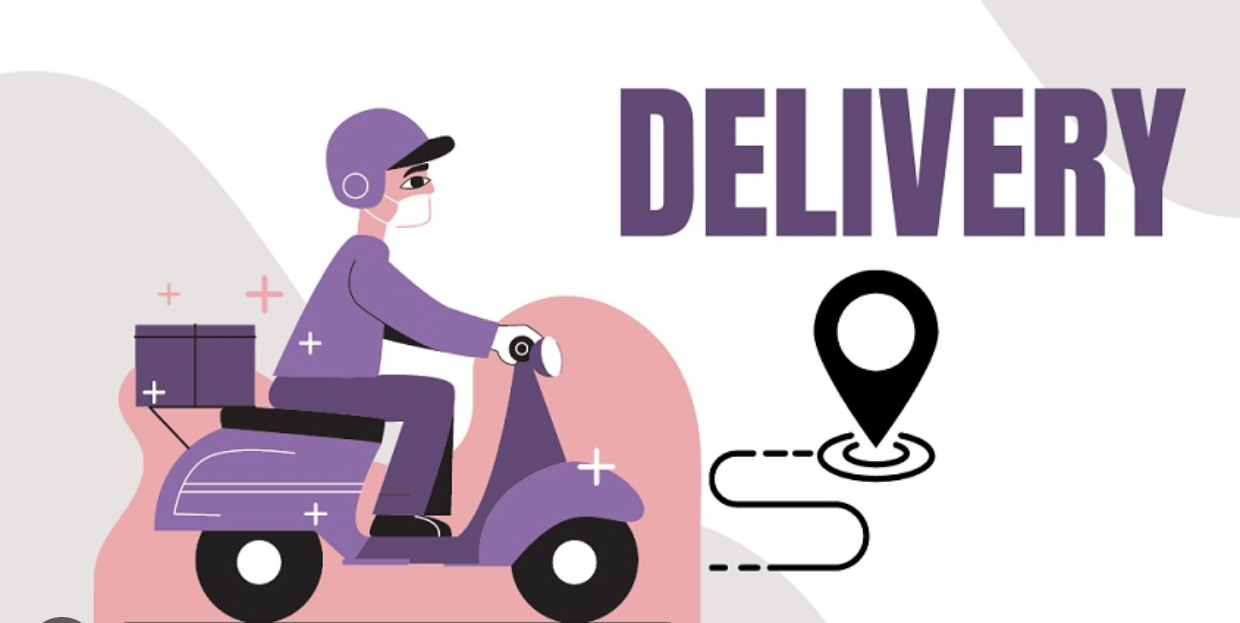

**The food delivery time prediction model plays a crucial role in the food delivery industry, where prompt and accurate delivery is of utmost importance. Delivery time directly impacts customer satisfaction and influences their overall experience.**

**To develop an effective prediction model, we began by thoroughly cleaning the dataset, ensuring it was free from errors and inconsistencies. This step was vital in ensuring the reliability and accuracy of the model's predictions.**

**Feature engineering was then employed to extract valuable insights from the dataset. By considering factors such as delivery person age, ratings, location coordinates, and time-related variables, we aimed to capture key variables that influence delivery time. These engineered features contributed to the model's predictive capabilities.**

**Using regression algorithms like linear regression, decision tree, random forest,XGBoost we built the predictive model. It was trained on a subset of the dataset using techniques like cross-validation to ensure robustness. Evaluation metrics such as mean squared error (MSE) and R-squared (R2) score were used to assess the model's accuracy. The food delivery time prediction model empowers businesses to optimize their operations and improve the overall delivery experience for their customers.**

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load & Understand Data

In [2]:
df_train = pd.read_csv(r"C:\Users\fahee\Downloads\archive\train.csv")
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [4]:
print("Train Dataset :", df_train.shape)

Train Dataset : (45593, 20)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [6]:
#Check statistical values for fields with numerical datatype
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [7]:
#Check statistical values for fields with other than numerical datatype
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


**Observations:**
1. There are null values present in Time_Orderd column.
2. Data Formatting will be required for Weatherconditions & Time_taken(min) column.
2. Both numerical & categorical features are present.
3. ID & Delivery_person_ID will not be used to build the model. 

In [8]:
#Explore each column
for column in df_train.columns:
    print(column)
    print(df_train[column].value_counts())
    print("------------------------------------")

ID
ID
0x4607     1
0x1f3e     1
0xe251     1
0x3f31     1
0x4a78     1
          ..
0xc3f1     1
0x5db7     1
0x1985     1
0xceda     1
0x5fb2     1
Name: count, Length: 45593, dtype: int64
------------------------------------
Delivery_person_ID
Delivery_person_ID
PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: count, Length: 1320, dtype: int64
------------------------------------
Delivery_person_Age
Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: count, dtype: int64
------------------------------------
Delivery_perso

# Data Cleaning

In [9]:
#Update Column Names
def update_column_name(df):
    #Renaming Weatherconditions column
    df.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)
    
update_column_name(df_train)
print(df_train.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [10]:
#Extract relevant values from column
def extract_column_value(df):
    #Extract time and convert to int
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))
    #Extract Weather conditions
    df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
    #Extract city code from Delivery person ID
    df['City_code']=df['Delivery_person_ID'].str.split("RES", expand=True)[0]
    
extract_column_value(df_train)
df_train[['Time_taken(min)','Weather_conditions','City_code']].head()

,Time_taken(min),Weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [11]:
#Drop Columns which won't be use for building model
def drop_columns(df):
    df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)
    
print("Before No. of columns: ",df_train.shape[1])
drop_columns(df_train)
print("After No. of columns: ",df_train.shape[1])

Before No. of columns:  21
After No. of columns:  19


In [12]:
#Check for Duplicate Values
if (len(df_train[df_train.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


In [13]:
#Update datatypes
def update_datatype(df):
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
    df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")
    
update_datatype(df_train)

In [14]:
#Convert String 'NaN' to np.nan
def convert_nan(df):
    df.replace('NaN', float(np.nan), regex=True,inplace=True)

convert_nan(df_train)

In [15]:
#Check null values
df_train.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weather_conditions              616
Road_traffic_density            601
Festival                        228
Order_Date                        0
Delivery_location_longitude       0
Time_Order_picked                 0
Delivery_location_latitude        0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Restaurant_longitude              0
Restaurant_latitude               0
Time_taken(min)                   0
City_code                         0
dtype: int64

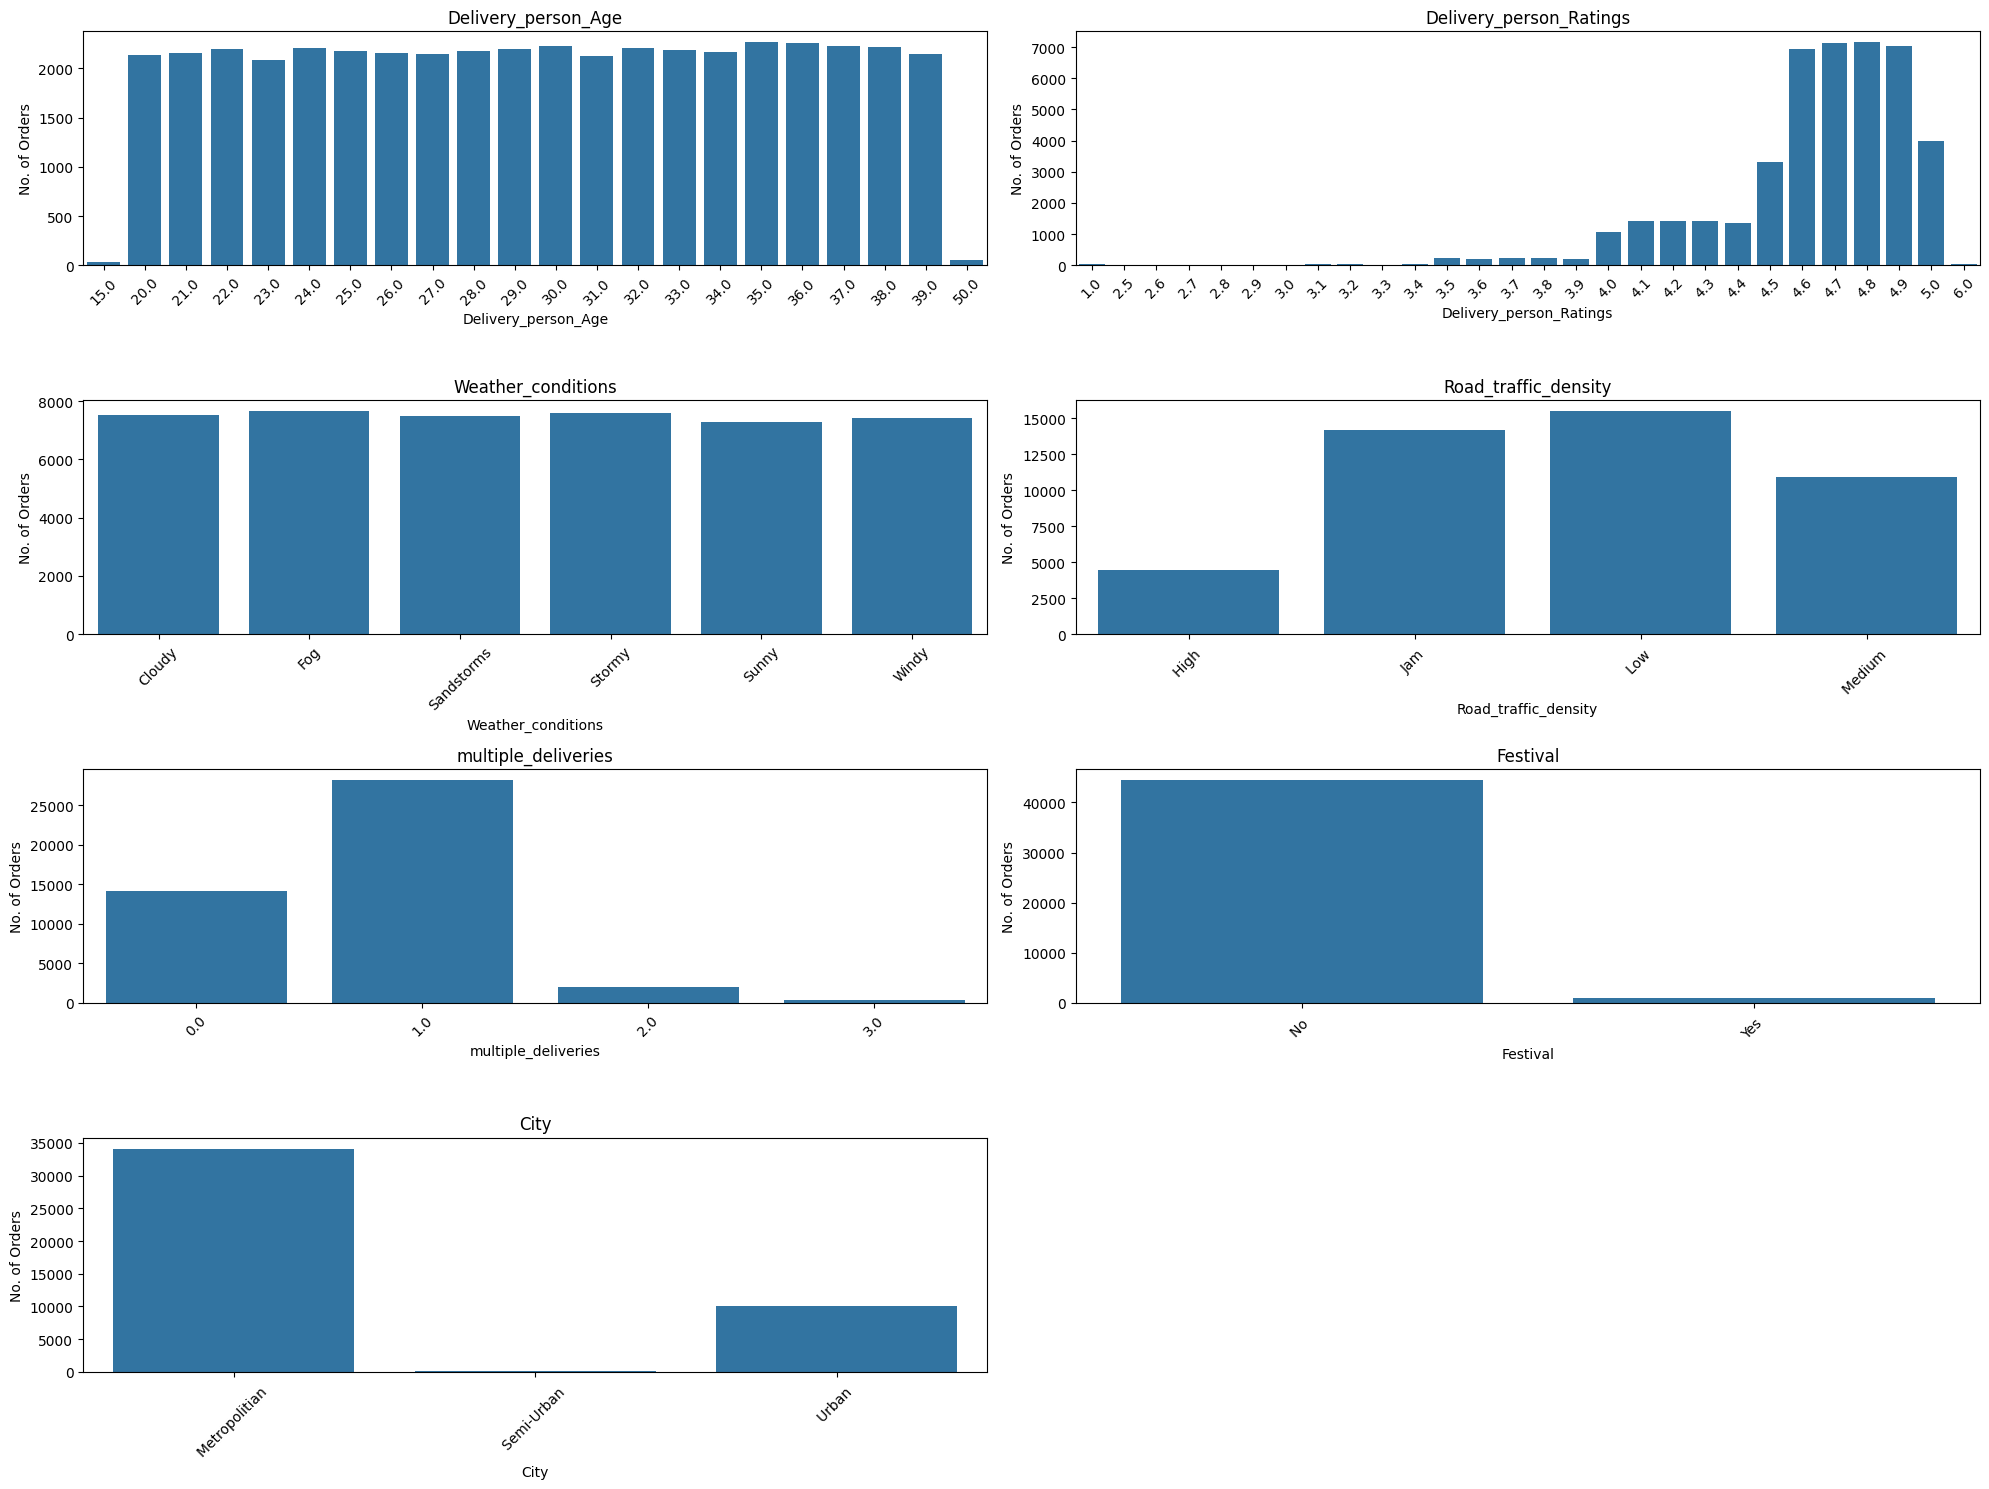

In [16]:
#Let's explore columns that have null values
cols = ['Delivery_person_Age','Delivery_person_Ratings','Weather_conditions','Road_traffic_density','multiple_deliveries','Festival','City']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20,15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data=df_train, x=column_name, order=df_train[column_name].value_counts().sort_index().index, ax=ax)

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=45)
    
if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [17]:
#Handle null values
def handle_null_values(df):
    df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']), inplace=True)
    df['Weather_conditions'].fillna(np.random.choice(df['Weather_conditions']), inplace=True)
    df['City'].fillna(df['City'].mode()[0], inplace=True)
    df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
    df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
    df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)
    
handle_null_values(df_train)
df_train.isnull().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
City_code                         0
dtype: int64

# Feature Engineering

In [18]:
def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.Order_Date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,1,2022,5,0,0,0,0,0,0,1


In [19]:
import pandas as pd
import numpy as np

def calculate_time_diff(df):
    # Ensure Order_Date is in datetime64 format
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])
    
    # Handle null values in Time_Orderd and Time_Order_picked before conversion
    df['Time_Orderd'] = df['Time_Orderd'].fillna('00:00:00')  # Replace NaN with a default time
    df['Time_Order_picked'] = df['Time_Order_picked'].fillna('00:00:00')  # Just in case
    
    # Convert time columns to timedelta
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])
    
    # Calculate base ordered and picked times
    df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']
    df['Time_Order_picked_base'] = df['Order_Date'] + df['Time_Order_picked']
    
    # Adjust for cases where picked time is on the next day using a mask
    mask = df['Time_Order_picked'] < df['Time_Orderd']
    df['Time_Order_picked_formatted'] = df['Time_Order_picked_base'].copy()
    df.loc[mask, 'Time_Order_picked_formatted'] += pd.Timedelta(days=1)
    
    # Calculate preparation time in minutes
    df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60
    
    # Handle null values in order_prepare_time by filling with the median
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)
    
    # Drop temporary and original time/date columns
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 
             'Time_Order_picked_base', 'Time_Order_picked_formatted', 'Order_Date'], 
            axis=1, inplace=True)

# Apply the function
calculate_time_diff(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,2022,5,0,0,0,0,0,0,1,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,2022,4,0,0,0,0,0,0,0,5.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,2022,5,0,0,0,0,0,0,1,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,2022,1,0,0,0,0,0,0,0,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,2022,5,0,0,0,0,0,0,1,15.0


In [20]:
#Calculate distance between restaurant location & delivery location
def calculate_distance(df):
    df['distance']=np.zeros(len(df))
    restaurant_coordinates=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    df['distance']= df['distance'].astype("str").str.extract('(\d+)').astype("int64")
    
calculate_distance(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,5,0,0,0,0,0,0,1,15.0,6


# Data Preprocessing

## Label Encoding

In [21]:
def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(df_train)
df_train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,3,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,3,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,4,3,0,0,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,0,0,1,3,...,5,0,0,0,0,0,0,1,15.0,6


## Train test split

In [22]:
#Split features & label
X = df_train.drop('Time_taken(min)', axis=1)  # Features
y = df_train['Time_taken(min)']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36474, 29)
(36474,)
(9119, 29)
(9119,)


## Standardization

In [23]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

# Model Building

### Steps
1. Employ cross-validation & hyper parameter tuning to determine the optimal regression model.
2. Construct the food delivery prediction model using the identified best model.
3. Evaluate the model's performance on the testing data to assess its accuracy and reliability.

### Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Find the best model
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {},  
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [100, 200, 300]},
    {'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]},
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

LinearRegression:
Best parameters: {}
Best R2 score: 0.4252386110730214

DecisionTreeRegressor:
Best parameters: {'max_depth': 7}
Best R2 score: 0.7239057831866915



### Model Building

In [ ]:
# Create a XGB regressor model
model = xgb.XGBRegressor(n_estimators=20,max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Model Evaluation

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 3.14
Mean Squared Error (MSE): 15.49
Root Mean Squared Error (RMSE): 3.94
R-squared (R2) Score: 0.82


# Conclusion

**In conclusion, the food delivery prediction model was developed using XGBoost, achieving an impressive R2 score of 0.82. Moving forward, potential enhancements include identifying the best features, conducting additional feature engineering, and exploring other optimization techniques to further improve the model's performance and accuracy. These steps will contribute to fine-tuning the model and unlocking its full potential in predicting food delivery timings accurately.**

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt

# Assuming df_train is your preprocessed DataFrame with 30 columns
# Add new features
df_train['distance_traffic'] = df_train['distance'] * df_train['Road_traffic_density']
df_train['distance_deliveries'] = df_train['distance'] * df_train['multiple_deliveries']
df_train['prep_traffic'] = df_train['order_prepare_time'] * df_train['Road_traffic_density']
df_train['age_ratings'] = df_train['Delivery_person_Age'] * df_train['Delivery_person_Ratings']
df_train['prep_distance'] = df_train['order_prepare_time'] * df_train['distance']

# Handle outliers
for col in ['distance', 'order_prepare_time', 'Delivery_person_Age', 'multiple_deliveries']:
    upper_limit = df_train[col].quantile(0.99)
    df_train[col] = np.where(df_train[col] > upper_limit, upper_limit, df_train[col])

# Split and scale
X = df_train.drop('Time_taken(min)', axis=1)
y = df_train['Time_taken(min)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
random_search = RandomizedSearchCV(
    xgb.XGBRegressor(),
    param_grid_xgb,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)
print("Best CV R2:", random_search.best_score_)

# Ensemble
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
ensemble_model = VotingRegressor([('xgb', best_model), ('rf', rf_model)])
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
print("Ensemble Test R2:", r2_score(y_test, y_pred_ensemble))
print("Ensemble Test RMSE:", root_mean_squared_error(y_test, y_pred_ensemble))  # Updated to use root_mean_squared_error

# Feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Top 12 Features:")
print(importance_df.head(12))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:12], importance_df['Importance'][:12])
plt.xlabel('Importance')
plt.title('Top 12 Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Retrain with top 12
top_12_features = importance_df['Feature'][:12].tolist()
X_train_top12 = X_train[:, [X.columns.get_loc(col) for col in top_12_features]]
X_test_top12 = X_test[:, [X.columns.get_loc(col) for col in top_12_features]]
best_model.fit(X_train_top12, y_train)
y_pred_top12 = best_model.predict(X_test_top12)
print("Test R2 with top 12:", r2_score(y_test, y_pred_top12))
print("Test RMSE with top 12:", root_mean_squared_error(y_test, y_pred_top12))  # Updated to use root_mean_squared_error

In [ ]:
# Save the model using joblib
import joblib
joblib.dump(best_model, 'best_model.pkl')


In [ ]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Load test data
df_test = pd.read_csv(r"C:\Users\fahee\Downloads\archive\test.csv")

# Step 1: Update Column Names
def update_column_name(df):
    df.rename(columns={'Weatherconditions': 'Weather_conditions'}, inplace=True)

update_column_name(df_test)

# Step 2: Extract Relevant Values from Columns
def extract_column_value(df):
    df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip() if pd.notnull(x) else x)
    df['City_code'] = df['Delivery_person_ID'].str.split("RES", expand=True)[0]

extract_column_value(df_test)

# Step 3: Drop Columns
def drop_columns(df):
    df.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)

drop_columns(df_test)

# Step 4: Update Data Types
def update_datatype(df):
    df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce').astype('float64')
    df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce').astype('float64')
    df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce').astype('float64')
    df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d-%m-%Y")

update_datatype(df_test)

# Step 5: Convert String 'NaN' to np.nan
def convert_nan(df):
    df.replace('NaN', float(np.nan), regex=True, inplace=True)

convert_nan(df_test)

# Step 6: Handle Null Values (Updated to avoid inplace warnings)
def handle_null_values(df):
    df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age'].dropna()))
    df['Weather_conditions'] = df['Weather_conditions'].fillna(np.random.choice(df['Weather_conditions'].dropna()))
    df['City'] = df['City'].fillna(df['City'].mode()[0])
    df['Festival'] = df['Festival'].fillna(df['Festival'].mode()[0])
    df['multiple_deliveries'] = df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0])
    df['Road_traffic_density'] = df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0])
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median())

handle_null_values(df_test)

# Step 7: Extract Date Features
def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.Order_Date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5, 6]), 1, 0)

extract_date_features(df_test)

# Step 8: Calculate Time Difference (Updated to avoid inplace warnings)
def calculate_time_diff(df):
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'].fillna('00:00:00'))
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'].fillna('00:00:00'))
    df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']
    df['Time_Order_picked_base'] = df['Order_Date'] + df['Time_Order_picked']
    mask = df['Time_Order_picked'] < df['Time_Orderd']
    df['Time_Order_picked_formatted'] = df['Time_Order_picked_base'].copy()
    df.loc[mask, 'Time_Order_picked_formatted'] += pd.Timedelta(days=1)
    df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60
    df['order_prepare_time'] = df['order_prepare_time'].fillna(df['order_prepare_time'].median())
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 
             'Time_Order_picked_base', 'Time_Order_picked_formatted', 'Order_Date'], 
            axis=1, inplace=True)

calculate_time_diff(df_test)

# Step 9: Calculate Distance
def calculate_distance(df):
    df['distance'] = np.zeros(len(df))
    restaurant_coordinates = df[['Restaurant_latitude', 'Restaurant_longitude']].to_numpy()
    delivery_location_coordinates = df[['Delivery_location_latitude', 'Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery).km for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])

calculate_distance(df_test)

# Step 10: Label Encoding
def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

label_encoding(df_test)

# Step 11: Add New Features
df_test['distance_traffic'] = df_test['distance'] * df_test['Road_traffic_density']
df_test['distance_deliveries'] = df_test['distance'] * df_test['multiple_deliveries']
df_test['prep_traffic'] = df_test['order_prepare_time'] * df_test['Road_traffic_density']
df_test['age_ratings'] = df_test['Delivery_person_Age'] * df_test['Delivery_person_Ratings']
df_test['prep_distance'] = df_test['order_prepare_time'] * df_test['distance']

# Step 12: Handle Outliers
for col in ['distance', 'order_prepare_time', 'Delivery_person_Age', 'multiple_deliveries']:
    upper_limit = df_test[col].quantile(0.99)
    df_test[col] = np.where(df_test[col] > upper_limit, upper_limit, df_test[col])

# Step 13: Select Top 12 Features
top_12_features = [
    'multiple_deliveries', 'Road_traffic_density', 'Vehicle_condition', 'Delivery_person_Ratings',
    'distance_deliveries', 'Weather_conditions', 'Festival', 'distance_traffic', 'distance',
    'Delivery_person_Age', 'prep_traffic', 'City'
]
X_test_final = df_test[top_12_features]

# Step 14: Scale the Top 12 Features
# Since best_model.pkl was trained on scaled data, we need to scale these features
# Ideally, we’d use the scaler from training subsetted to these 12 features, but we’ll fit a new one for now
scaler_12 = StandardScaler()
X_test_final_scaled = scaler_12.fit_transform(X_test_final)

# Step 15: Load Model and Predict
best_model = joblib.load('best_model.pkl')
y_pred = best_model.predict(X_test_final_scaled)

# Step 16: Add Predictions to Original DataFrame (with ID)
df_test_with_id = pd.read_csv(r"C:\Users\fahee\Downloads\archive\test.csv")
predictions_df = pd.DataFrame({
    'ID': df_test_with_id['ID'],
    'Predicted_Time_taken(min)': y_pred
})

# Print and Save Predictions
print(predictions_df.head())
predictions_df.to_csv('predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'")